# Redes Neurais com PyTorch

PyTorch é uma biblioteca poderosa para construir e treinar redes neurais, amplamente usada em pesquisa e desenvolvimento de modelos de aprendizado profundo. Ele oferece ferramentas para manipulação eficiente de **tensores** — a estrutura de dados essencial para representar e processar informações em redes neurais — e integra suporte para cálculos automáticos de gradientes, fundamentais para o aprendizado dos parâmetros do modelo.

## O que são Tensores?

Tensores são estruturas de dados generalizadas que podem representar escalars, vetores, matrizes e dados de maior dimensionalidade. Em redes neurais, eles são usados para armazenar e operar sobre entradas, saídas, pesos e gradientes. Por exemplo:

- **Escalar** (tensor de ordem 0): Representa um único número.
- **Vetor** (tensor de ordem 1): Sequência de números, como uma lista.
- **Matriz** (tensor de ordem 2): Tabela bidimensional de números.
- **Tensor de ordem superior**: Estrutura com mais de duas dimensões, como imagens em RGB (com dimensões de altura, largura e canais de cor).

Os tensores em PyTorch permitem cálculos eficientes e paralelos em GPUs, acelerando o treinamento de modelos complexos. Com eles, é possível realizar operações matemáticas como multiplicação de matrizes, somas e transformações que são fundamentais para as operações internas das redes neurais.

Com PyTorch, é possível implementar redes neurais de diferentes arquiteturas de forma flexível e intuitiva, facilitando a criação de modelos personalizados. A biblioteca também inclui uma vasta coleção de funções de ativação, otimização e loss, além de camadas comuns para redes convolucionais, recorrentes e totalmente conectadas. PyTorch simplifica tanto a construção de modelos quanto o treinamento em GPUs, acelerando o desenvolvimento de soluções de inteligência artificial.

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Transformação para normalizar os dados
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Carregando os dados de treinamento e teste
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('.', train=False, transform=transform)

# DataLoaders para iteração em batches
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 35.7MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.25MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.51MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



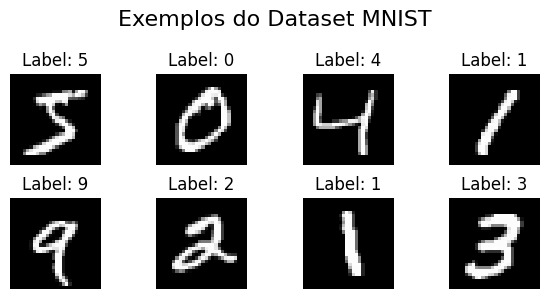

In [5]:
# Função para mostrar um grid de imagens
def show_mnist_examples(dataset, num_rows=4, num_cols=4):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 3))
    fig.suptitle("Exemplos do Dataset MNIST", fontsize=16)

    for i in range(num_rows * num_cols):
        img, label = dataset[i]
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(img.squeeze(), cmap="gray")
        ax.set_title(f"Label: {label}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Exibindo um grid de 4x4 imagens
show_mnist_examples(train_dataset, num_rows=2, num_cols=4)

A equação total da rede neural com duas camadas é:

$$
\text{output} = \text{softmax}((\text{ReLU}(X W_1 + b_1)) W_2 + b_2)
$$

onde:

- **$ X $**: Entrada da rede com dimensão $ N \times 784 $ (para $ N $ amostras).
- **$ W_1 $** e **$ b_1 $**: Pesos e bias da primeira camada.
- **$ W_2 $** e **$ b_2 $**: Pesos e bias da segunda camada.
- **ReLU**: Função de ativação na camada oculta.
- **softmax**: Função de ativação na camada de saída para normalizar as saídas em probabilidades.

In [6]:
torch.manual_seed(42)

# Parâmetros da camada 1
W1 = torch.randn(784, 128, requires_grad=True)
b1 = torch.zeros(128, requires_grad=True)

# Parâmetros da camada 2
W2 = torch.randn(128, 10, requires_grad=True)
b2 = torch.zeros(10, requires_grad=True)

In [13]:
W1.shape, b1.shape, W2.shape, b2.shape

(torch.Size([784, 128]),
 torch.Size([128]),
 torch.Size([128, 10]),
 torch.Size([10]))

In [7]:
def relu(x):
    return torch.maximum(x, torch.tensor(0.0))

def model_1(x):
    x = x.view(-1, 28*28)  # Achata a imagem em um vetor de 784 elementos
    z1 = x @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    return z2

In [15]:
x, y = next(iter(train_loader))

print (f'x={x.shape}, y={y.shape}')

x=torch.Size([64, 1, 28, 28]), y=torch.Size([64])


In [9]:
x = x.view(-1, 28*28)
z1 = x @ W1 + b1
z1.shape

torch.Size([64, 128])

A equação da perda de entropia cruzada com softmax para $ N $ amostras é:

$$
\text{Loss} = -\frac{1}{N} \sum_{i=1}^N \log(p_{\text{true}}^{(i)})
$$
onde:
- **$ \text{Loss} $**: Média da perda para todas as amostras, representando a entropia cruzada média entre as previsões e os rótulos verdadeiros.
- **$ N $**: Número total de amostras.
- **$ p_{\text{true}}^{(i)} $**: Probabilidade prevista para a classe correta da $ i $-ésima amostra, obtida pelo softmax.
- **$ \log(p_{\text{true}}^{(i)}) $**: Logaritmo da probabilidade da classe correta, penalizando previsões incorretas mais fortemente quanto menor for a probabilidade da classe correta.


In [10]:
def softmax_cross_entropy(logits, labels):
    logits_exp = torch.exp(logits - torch.max(logits, dim=1, keepdim=True).values)
    softmax = logits_exp / torch.sum(logits_exp, dim=1, keepdim=True)
    log_softmax = torch.log(torch.clamp(softmax, min=1e-9))
    correct_log_probs = log_softmax.gather(1, labels.unsqueeze(1)).squeeze(1)
    loss = -torch.mean(correct_log_probs)
    return loss

In [16]:
from tqdm import tqdm

def train_model(train_loader, train_dataset, model, optimizer, loss_fn, num_epochs=5):
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        for data, target in tqdm(train_loader):
            logits = model(data)
            loss = loss_fn(logits, target)
            total_loss += loss.item()

            predictions = torch.argmax(logits, dim=1)
            correct += (predictions == target).sum().item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(train_loader)
        accuracy = correct / len(train_dataset)
        print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

In [17]:
optimizer = torch.optim.SGD([W1, b1, W2, b2], lr=0.1)
train_model(train_loader, train_dataset, model_1, optimizer, softmax_cross_entropy, num_epochs=5)

100%|██████████| 938/938 [00:20<00:00, 45.27it/s]


Epoch 1, Loss: 7.8008, Accuracy: 0.6177


100%|██████████| 938/938 [00:20<00:00, 46.18it/s]


Epoch 2, Loss: 5.4783, Accuracy: 0.7323


100%|██████████| 938/938 [00:19<00:00, 48.25it/s]


Epoch 3, Loss: 5.2187, Accuracy: 0.7455


100%|██████████| 938/938 [00:20<00:00, 46.67it/s]


Epoch 4, Loss: 5.0534, Accuracy: 0.7538


100%|██████████| 938/938 [00:20<00:00, 46.75it/s]

Epoch 5, Loss: 4.9464, Accuracy: 0.7591


# Introdução ao `torch.nn`

O módulo `torch.nn` fornece classes e funções úteis para a construção de redes neurais no PyTorch. Ele oferece camadas predefinidas, funções de ativação, funções de perda e muito mais, facilitando o desenvolvimento de modelos complexos.

In [18]:
import torch.nn as nn

## `nn.Linear`

Para entender como `torch.nn` pode simplificar a construção de redes neurais, vamos começar com `nn.Linear`, uma camada que aplica uma transformação linear. A camada `nn.Linear` é definida como:

$$
\text{output} = \text{input} \times \text{weight}^T + \text{bias}
$$

In [20]:
# Exemplo de uso da camada Linear
linear_layer = nn.Linear(in_features=4, out_features=3)
input_tensor = torch.randn(1, 4)  # Batch de tamanho 1 com 4 features
output_tensor = linear_layer(input_tensor)

print("Input:\n", input_tensor)
print("Output:\n", output_tensor)
print("Pesos:\n", linear_layer.weight)
print("Bias:\n", linear_layer.bias)

Input:
 tensor([[ 0.3367, -1.1663, -2.2917, -2.0169]])
Output:
 tensor([[ 1.0072,  0.6396, -0.2663]], grad_fn=<AddmmBackward0>)
Pesos:
 Parameter containing:
tensor([[ 0.3546,  0.3092, -0.1702, -0.3153],
        [ 0.2994, -0.0269, -0.1068, -0.0239],
        [-0.4506, -0.1330,  0.4244, -0.3686]], requires_grad=True)
Bias:
 Parameter containing:
tensor([ 0.2225,  0.2145, -0.0406], requires_grad=True)


# Construindo Modelos com `nn.Sequential`

O `nn.Sequential` é uma maneira prática e concisa de construir redes neurais no PyTorch. Ele permite empilhar camadas e operações em sequência, o que é ideal para redes em que cada camada é aplicada uma após a outra, sem operações intermediárias complexas.

In [21]:
simple_model = nn.Sequential(
    nn.Linear(4, 3),  # Camada Linear de 4 entradas para 3 saídas
    nn.ReLU(),        # Função de ativação ReLU
    nn.Linear(3, 2)   # Camada Linear de 3 entradas para 2 saídas
)

# Exemplo de uso
input_tensor = torch.randn(1, 4)  # Batch de tamanho 1 com 4 features
output_tensor = simple_model(input_tensor)

print("Input:", input_tensor)
print("Output:", output_tensor)

Input: tensor([[-1.9820,  1.1826, -1.3573, -0.0082]])
Output: tensor([[-0.5303, -0.1114]], grad_fn=<AddmmBackward0>)


In [22]:
model_2 = nn.Sequential(
    nn.Flatten(),         # Transforma a imagem em um vetor de 784 elementos (28 * 28 = 784)
    nn.Linear(784, 128),  # Camada Linear de entrada
    nn.ReLU(),            # Função de ativação
    nn.Linear(128, 10)    # Camada Linear de saída
)

In [23]:
model_2

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [24]:
loss_fn = nn.CrossEntropyLoss()  # Entropia cruzada para problemas de classificação
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [25]:
train_model(train_loader, train_dataset, model_2, optimizer, loss_fn, num_epochs=5)

100%|██████████| 938/938 [00:18<00:00, 50.43it/s]


Epoch 1, Loss: 0.2650, Accuracy: 0.9214


100%|██████████| 938/938 [00:19<00:00, 48.62it/s]


Epoch 2, Loss: 0.1173, Accuracy: 0.9657


100%|██████████| 938/938 [00:18<00:00, 51.34it/s]


Epoch 3, Loss: 0.0824, Accuracy: 0.9757


100%|██████████| 938/938 [00:20<00:00, 45.83it/s]


Epoch 4, Loss: 0.0631, Accuracy: 0.9813


100%|██████████| 938/938 [00:18<00:00, 50.82it/s]

Epoch 5, Loss: 0.0497, Accuracy: 0.9850


# Construindo Modelos com `nn.Module`

Embora `nn.Sequential` seja útil para redes simples onde as camadas são aplicadas em sequência, ele é limitado quando precisamos de mais flexibilidade. Para casos mais complexos, onde podemos querer camadas adicionais, diferentes caminhos de cálculo ou operações customizadas, o PyTorch oferece a classe `nn.Module`.

Ao criar um modelo com `nn.Module`, temos controle total sobre a arquitetura e o fluxo de dados, pois definimos as camadas e o método `forward` explicitamente.

## Estrutura Básica de um `nn.Module`

Para construir um modelo com `nn.Module`, criamos uma classe que herda de `nn.Module` e define as camadas e o fluxo dos dados. A estrutura básica é:

1. No método `__init__`, definimos as camadas.
2. No método `forward`, definimos o fluxo de dados.

In [26]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Definindo as camadas
        self.fc1 = nn.Linear(784, 128)  # Camada totalmente conectada de entrada
        self.relu = nn.ReLU()           # Função de ativação ReLU
        self.fc2 = nn.Linear(128, 10)   # Camada totalmente conectada de saída

        # Initialize
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.zeros_(self.fc1.bias)

    def forward(self, x):
        # Definindo o fluxo de dados
        x = x.view(-1, 28*28)  # Achata a imagem para um vetor de 784 elementos
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [27]:
model_3 = SimpleNN()

In [28]:
pred = model_3(x)

In [29]:
loss_fn = nn.CrossEntropyLoss()  # Entropia cruzada para problemas de classificação
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [30]:
train_model(train_loader, train_dataset, model_3, optimizer, loss_fn, num_epochs=5)

100%|██████████| 938/938 [00:19<00:00, 47.82it/s]


Epoch 1, Loss: 0.2584, Accuracy: 0.9225


100%|██████████| 938/938 [00:18<00:00, 50.86it/s]


Epoch 2, Loss: 0.1145, Accuracy: 0.9659


100%|██████████| 938/938 [00:19<00:00, 47.37it/s]


Epoch 3, Loss: 0.0796, Accuracy: 0.9768


100%|██████████| 938/938 [00:18<00:00, 50.88it/s]


Epoch 4, Loss: 0.0622, Accuracy: 0.9810


100%|██████████| 938/938 [00:19<00:00, 48.11it/s]

Epoch 5, Loss: 0.0484, Accuracy: 0.9858


In [31]:
x, y = test_dataset[0]
x.shape, y

(torch.Size([1, 28, 28]), 7)

In [33]:
with torch.no_grad():
  pred = model_3(x.unsqueeze(0))

y_pred = pred.argmax()

print(y_pred)
print(torch.softmax(pred, dim=1))

tensor(7)
tensor([[4.1424e-06, 5.7015e-06, 1.4518e-04, 1.9890e-03, 6.0886e-09, 5.4678e-07,
         8.3342e-10, 9.9677e-01, 7.1832e-05, 1.0106e-03]])


In [34]:
# logits

pred

tensor([[-1.3050, -0.9855,  2.2517,  4.8691, -7.8276, -3.3300, -9.8162, 11.0860,
          1.5481,  4.1920]])

## Exercícios
Agora é sua vez!

### Exercício 1

Em um dado problema, você deverá implementar um modelo que receba como entrada imagens de dimensões 16x16, possua 2 camadas ocultas e terá como saída 5 classes. Implemente a classe referente ao modelo (utilize `nn.Module`) e teste com tensores aleatórios.

In [36]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super(ImageClassifier, self).__init__()
        self.fc1 = nn.Linear(16 * 16, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 5)

    def forward(self, x):
        x = x.view(-1, 16 * 16)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Testando com um tensor aleatório
model = ImageClassifier()
random_input = torch.randn(1, 16, 16)  # Um exemplo de entrada
output = model(random_input)
output

tensor([[0.0986, 0.1152, 0.1413, 0.2175, 0.1052]], grad_fn=<AddmmBackward0>)

### Exercício 2

Agora, considere o mesmo problema do exercício anterior mas considere que as imagens são RGB. Compare o número de parâmetros deste modelo com o anterior.

In [37]:
class RGBImageClassifier(nn.Module):
    def __init__(self):
        super(RGBImageClassifier, self).__init__()
        self.fc1 = nn.Linear(16 * 16 * 3, 128)  # Entrada agora com 3 canais
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 5)

    def forward(self, x):
        x = x.view(-1, 16 * 16 * 3)  # Achatar com 3 canais
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Testando com um tensor aleatório
rgb_model = RGBImageClassifier()
random_rgb_input = torch.randn(1, 3, 16, 16)  # Entrada RGB
rgb_output = rgb_model(random_rgb_input)


# Comparando o número de parâmetros... Aqui apelei pro Gemini mesmo pq não tinha nem noção de como fazer este cálculo
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Número de parâmetros do modelo original:", count_parameters(ImageClassifier()))
print("Número de parâmetros do modelo RGB:", count_parameters(rgb_model))

Número de parâmetros do modelo original: 41477
Número de parâmetros do modelo RGB: 107013


In [47]:
for p in model.parameters():
  print (f'shape: {p.shape}, requires_grad: {p.requires_grad}')
  p.numel
  # print(p.shape)
  # print(p.requires_grad)

shape: torch.Size([128, 256]), requires_grad: True
shape: torch.Size([128]), requires_grad: True
shape: torch.Size([64, 128]), requires_grad: True
shape: torch.Size([64]), requires_grad: True
shape: torch.Size([5, 64]), requires_grad: True
shape: torch.Size([5]), requires_grad: True
